In [3]:
# Média Móvel Convergente e Divergente (MACD)

In [4]:
# fornece ao investidor capacidade de identificar a direção da tendência de curto prazo.

In [5]:
# o valor para a média móvel de longo prazo é subtraído da média móvel de curto prazo, em períodos de 12 e 26 dias

In [6]:
!pip install pandas
!pip install matplotlib
!pip install pandas_datareader


In [7]:
import pandas_datareader.data as pdr
import datetime
import matplotlib.pyplot as plt

In [9]:
# Download historical data for required stocks
ticker = "MSFT"
ohlcv = pdr.get_data_yahoo(ticker,datetime.date.today()-datetime.timedelta(1825),datetime.date.today())

In [10]:
type(ohlcv)

pandas.core.frame.DataFrame

In [11]:
ohlcv.shape

(1258, 6)

In [13]:
ohlcv.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-19,48.099998,47.169998,47.630001,47.660000,64551200.0,42.787170
2014-12-22,48.119999,47.709999,47.779999,47.980000,26566000.0,43.074444
2014-12-23,48.799999,48.130001,48.369999,48.450001,23648100.0,43.496403
2014-12-24,48.639999,48.080002,48.639999,48.139999,11437800.0,43.218105


In [14]:
ohlcv.tail(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-13,154.889999,152.830002,153.000000,154.529999,23845400.0,154.529999
2019-12-16,155.899994,154.820007,155.110001,155.529999,24144200.0,155.529999
2019-12-17,155.710007,154.449997,155.449997,154.690002,25425600.0,154.690002
2019-12-18,155.212708,154.190002,154.300003,154.369995,18926677.0,154.369995


In [16]:
def MACD(DF,a,b,c):
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""
    df = DF.copy()
    
    # 12 Day Exponential Moving Average.
    df["MA_Fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean()
    
    # 26 Day Exponential Moving Average.
    df["MA_Slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    
    # Subtract the 26 Day EMA from the 12 Day EMA, arriving at the MACD
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    return df

In [17]:
# Visualization - plotting MACD/signal along with close price and volume for last 100 data points
df = MACD(ohlcv, 12, 26, 9)

In [18]:
df.shape

(1225, 10)

In [20]:
df.head(4)

,High,Low,Open,Close,Volume,Adj Close,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,,
2015-02-09,42.740002,42.209999,42.240002,42.360001,31381100.0,38.029053,38.446718,39.417144,-0.970427,-0.997964
2015-02-10,42.770000,42.180000,42.740002,42.599998,29670700.0,38.244511,38.415519,39.323981,-0.908463,-0.977910
2015-02-11,42.650002,42.209999,42.650002,42.380001,38262500.0,38.047009,38.358686,39.223071,-0.864385,-0.953072
2015-02-12,43.090000,42.509998,42.660000,43.090000,33268800.0,38.684406,38.408901,39.180714,-0.771814,-0.914145


In [21]:
df.tail(4)

,High,Low,Open,Close,Volume,Adj Close,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,,
2019-12-13,154.889999,152.830002,153.000000,154.529999,23845400.0,154.529999,151.534221,149.420542,2.113679,2.119048
2019-12-16,155.899994,154.820007,155.110001,155.529999,24144200.0,155.529999,152.148956,149.873094,2.275862,2.150411
2019-12-17,155.710007,154.449997,155.449997,154.690002,25425600.0,154.690002,152.539886,150.229902,2.309984,2.182325
2019-12-18,155.212708,154.190002,154.300003,154.369995,18926677.0,154.369995,152.821441,150.536576,2.284866,2.202834


/home/johnny/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


([], <a list of 0 Text xticklabel objects>)

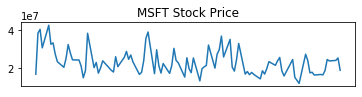

In [22]:
plt.subplot(311)
plt.plot(df.iloc[-100:,4])
plt.title('MSFT Stock Price')
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

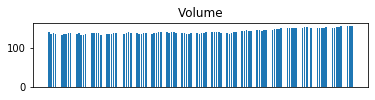

In [23]:
plt.subplot(312)
plt.bar(df.iloc[-100:,5].index, df.iloc[-100:,5].values)
plt.title('Volume')
plt.xticks([])

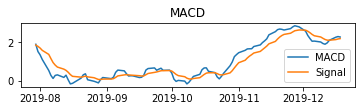

In [24]:
fig, ax = plt.subplots()
# plt.subplot(313)
plt.plot(df.iloc[-100:,[-2,-1]])
plt.title('MACD')
plt.legend(('MACD','Signal'),loc='lower right')

In [25]:
plt.show()

Text(0.5, 0.98, 'Stock Price with MACD')

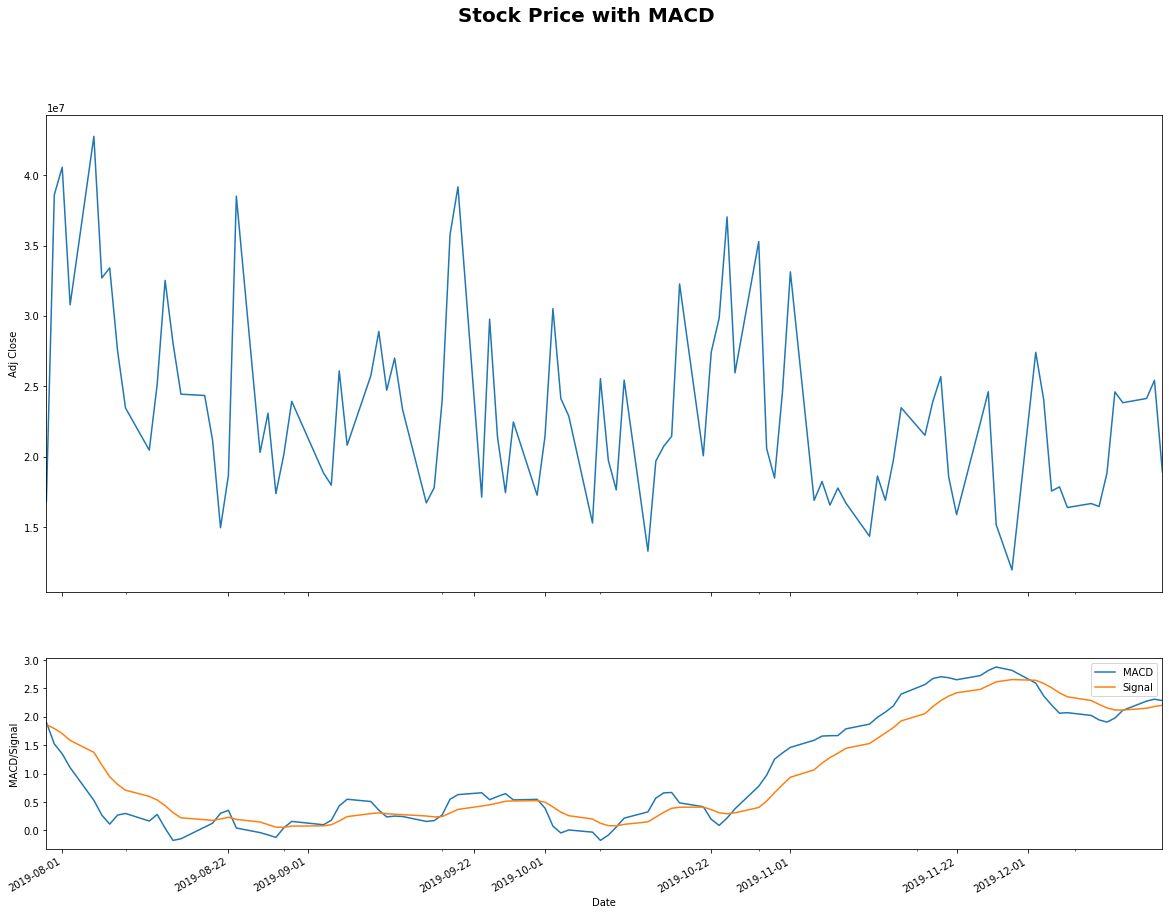

In [47]:
# Visualization - Using object orient approach
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(20, 15), gridspec_kw = {'height_ratios':[2.5, 1]})
df.iloc[-100:,4].plot(ax=ax0)
ax0.set(ylabel='Adj Close')

df.iloc[-100:,[-2,-1]].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MACD/Signal')
# Title the figure
fig.suptitle('Stock Price with MACD', fontsize=20, fontweight='bold')

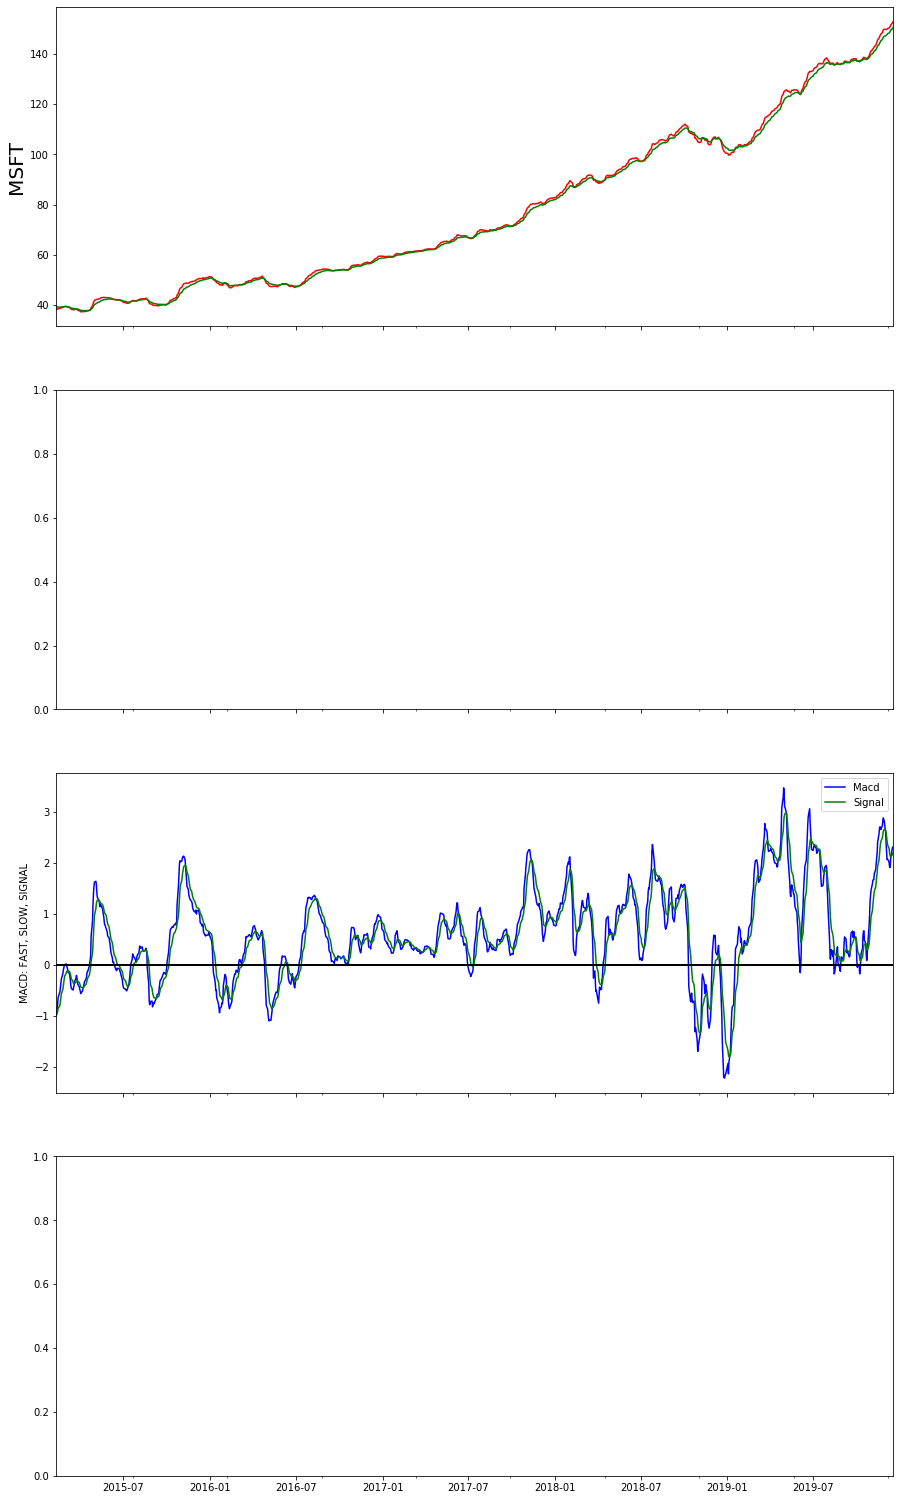

In [52]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
ax1.set_ylabel(ticker, size=20)
fig.set_size_inches(15,30)

# Draw Moving Averages
df["MA_Fast"].plot(ax=ax1, c='r')
df["MA_Slow"].plot(ax=ax1, c='g')

ax3.set_ylabel('MACD: FAST, SLOW, SIGNAL')

df['MACD'].plot(ax=ax3, color='b', label='Macd')
df['Signal'].plot(ax=ax3, color='g', label='Signal')
ax3.axhline(0, lw=2, color='0')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels)

